# Breast Cancer classification

For binary classification, SVM finds the line (or hyperplane) that best separates data into two classes.



In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [7]:
df=pd.read_csv(r"C:\Users\suchi\Desktop\ELEVATE LABS\SVM\breast-cancer.csv")
df.head()
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Drop the ID column
df=df.drop(columns=['id'])

In [9]:
# Encode the target column: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.dropna(subset=['diagnosis'])  # drop rows where mapping failed


In [10]:
#split features and target 
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2.Train an SVM with linear and RBF kernel.

In [13]:
# Train-Test Split (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=99)
print(Y_train.isnull().sum())  # Check how many NaNs

0


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#linear boundaryyy
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
y_pred_linear=svm_linear.predict(X_test)
print(y_pred_linear)
print("LINEAR SVM ACCURACY",accuracy_score(Y_test,y_pred_linear))

## RBF SVM
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,Y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print(y_pred_rbf)
print("RBF SVM Accuracy:", accuracy_score(Y_test, y_pred_rbf))


[0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0]
LINEAR SVM ACCURACY 0.9736842105263158
[0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0]
RBF SVM Accuracy: 0.9649122807017544


3.Visualize decision boundary using 2D data.


Since we have 30 features, we can't directly visualize decision boundaries. But we can:

Use PCA (Principal Component Analysis) to reduce data to 2D.

Then plot decision boundaries in 2D.

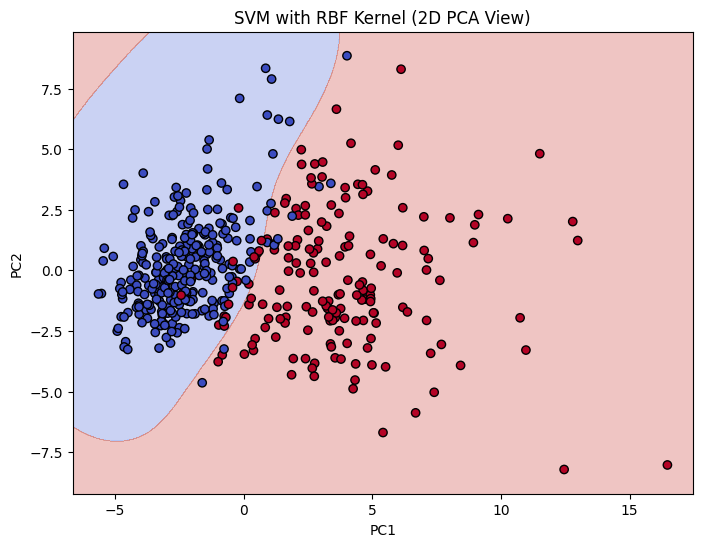

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train SVM on 2D data for visualization
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_2D, Y_train)

# Plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

plot_decision_boundary(svm_vis, X_train_2D, Y_train, "SVM with RBF Kernel (2D PCA View)")


4.Tune hyperparameters like C and gamma.


C: Controls margin size and misclassification penalty.--controls how strict your model is about getting every training point right.

Gamma: Controls how far influence of a training point reaches in RBF.

We can use Grid Search to find the best combination.

In [26]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score (on training folds):", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
print("Test Accuracy:", best_model.score(X_test, Y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score (on training folds): 0.9736263736263737
Test Accuracy: 0.9824561403508771


5: Use Cross-Validation to Evaluate Performance

In [28]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores (on full scaled data)
svm_cv = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
cv_scores = cross_val_score(svm_cv, X_scaled, Y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV accuracy: 0.9789318428815401


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Linear SVM cross-validation
svm_linear = SVC(kernel='linear', C=1)  # You can change C if you want
cv_scores_linear = cross_val_score(svm_linear, X_scaled, Y, cv=5)
print("Linear SVM CV scores:", cv_scores_linear)
print("Linear SVM Mean CV accuracy:", cv_scores_linear.mean())

# RBF SVM cross-validation
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')  # gamma='scale' is default recommended
cv_scores_rbf = cross_val_score(svm_rbf, X_scaled, Y, cv=5)
print("RBF SVM CV scores:", cv_scores_rbf)
print("RBF SVM Mean CV accuracy:", cv_scores_rbf.mean())


Linear SVM CV scores: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
Linear SVM Mean CV accuracy: 0.9701443875174661
RBF SVM CV scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
RBF SVM Mean CV accuracy: 0.9736376339077782
